In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from scipy import stats

In [5]:
sales = pd.read_csv('shop_sales.csv')

In [6]:
sales

,item_id,store_id,date_id,cnt
0,STORE_2_085,STORE_2,1,3
1,STORE_2_085,STORE_2,2,8
2,STORE_2_085,STORE_2,3,0
3,STORE_2_085,STORE_2,4,3
4,STORE_2_085,STORE_2,5,0
...,...,...,...,...
81850,STORE_1_727,STORE_1,1815,2
81851,STORE_1_727,STORE_1,1816,3
81852,STORE_1_727,STORE_1,1817,1
81853,STORE_1_727,STORE_1,1818,4


In [7]:
# 3 магазина - нужно выбрать 1 из 3
stores = list(sales.store_id.unique())
print(stores)

['STORE_2', 'STORE_3', 'STORE_1']


## Выбираю STORE_1

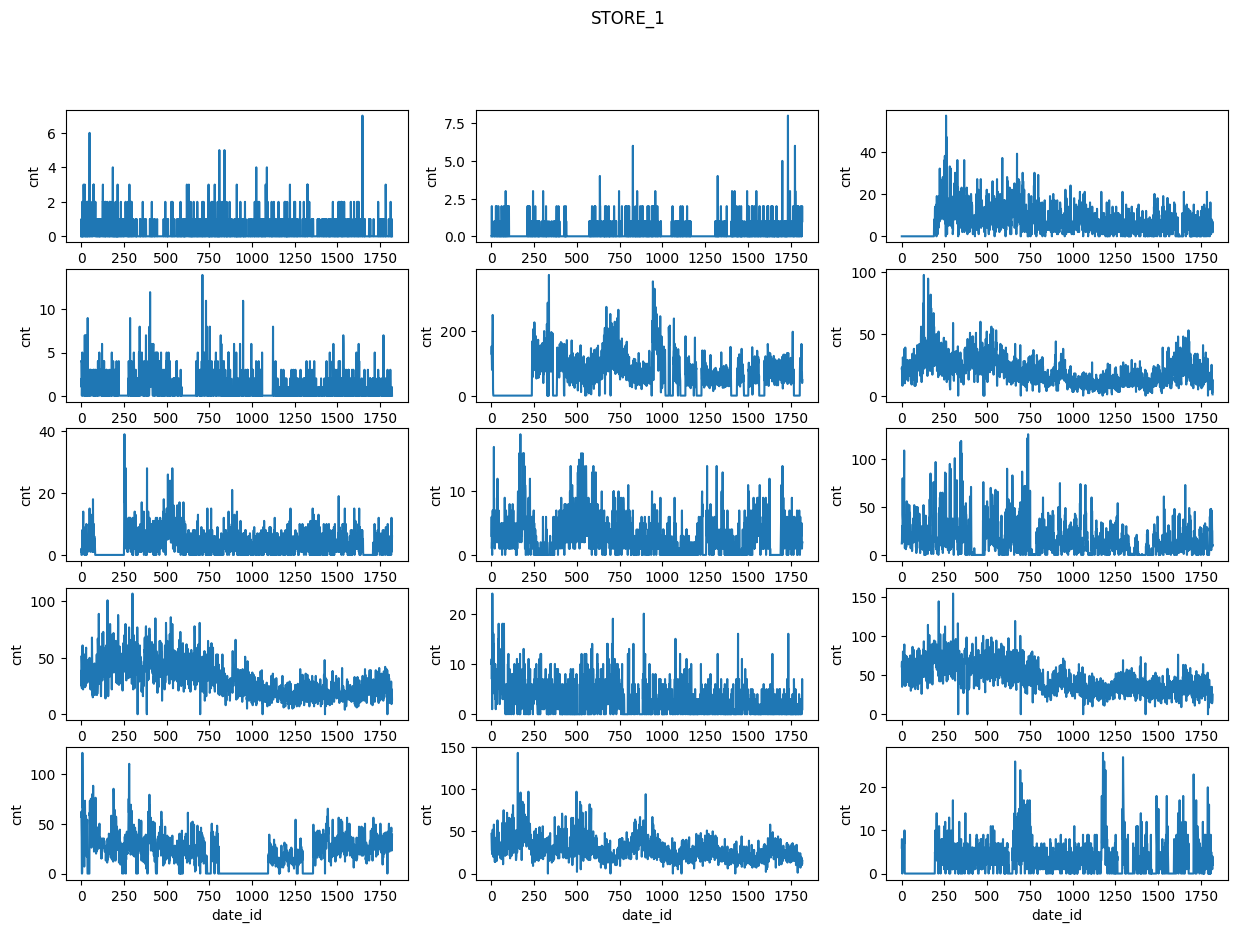

In [8]:
fig,ax = plt.subplots(5,3,figsize=(15,10))

for i, art in enumerate(sales[sales.store_id=='STORE_1'].item_id.unique()):
    sns.lineplot(data = sales[(sales.item_id==art) & (sales.store_id=='STORE_1')],
                 x='date_id',y='cnt',ax = ax[i//3][i%3])
plt.suptitle("STORE_1");

In [9]:
#данные о датах и праздниках (соединяется с продажами по полю date_id)
calendar = pd.read_csv('shop_sales_dates.csv')

In [10]:
calendar.head(4)

,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,date_id,CASHBACK_STORE_1,CASHBACK_STORE_2,CASHBACK_STORE_3
0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,1,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,2,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,3,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,4,0,1,1


In [11]:
calendar['CASHBACK_STORE_3'].value_counts()

CASHBACK_STORE_3
0    1219
1     600
Name: count, dtype: int64

In [12]:
#данные о датах и праздниках (соединяется с датами по полю wm_yr_wk)
prices = pd.read_csv('shop_sales_prices.csv')

In [13]:
prices

,store_id,item_id,wm_yr_wk,sell_price
0,STORE_2,STORE_2_085,11101,1.00
1,STORE_2,STORE_2_043,11101,2.88
2,STORE_2,STORE_2_054,11101,2.28
3,STORE_2,STORE_2_090,11101,1.25
4,STORE_2,STORE_2_252,11101,1.48
...,...,...,...,...
11136,STORE_1,STORE_1_584,11551,1.00
11137,STORE_1,STORE_1_586,11551,1.68
11138,STORE_1,STORE_1_587,11551,2.48
11139,STORE_1,STORE_1_714,11551,1.58


In [14]:
prices['sell_price'].max()

6.71

In [15]:
sales

,item_id,store_id,date_id,cnt
0,STORE_2_085,STORE_2,1,3
1,STORE_2_085,STORE_2,2,8
2,STORE_2_085,STORE_2,3,0
3,STORE_2_085,STORE_2,4,3
4,STORE_2_085,STORE_2,5,0
...,...,...,...,...
81850,STORE_1_727,STORE_1,1815,2
81851,STORE_1_727,STORE_1,1816,3
81852,STORE_1_727,STORE_1,1817,1
81853,STORE_1_727,STORE_1,1818,4


In [30]:
sales[(sales['store_id'] == 'STORE_1')]['item_id'].unique()

array(['STORE_1_064', 'STORE_1_065', 'STORE_1_325', 'STORE_1_376',
       'STORE_1_090', 'STORE_1_252', 'STORE_1_339', 'STORE_1_546',
       'STORE_1_547', 'STORE_1_555', 'STORE_1_584', 'STORE_1_586',
       'STORE_1_587', 'STORE_1_714', 'STORE_1_727'], dtype=object)

In [17]:
customer1 = sales[(sales['store_id'] == 'STORE_1') & (sales['item_id'] == 'STORE_1_064')]
store_1_064 = pd.merge(customer1, calendar, on='date_id', how='inner')
store_1_064.head(5)

,item_id,store_id,date_id,cnt,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,CASHBACK_STORE_1,CASHBACK_STORE_2,CASHBACK_STORE_3
0,STORE_1_064,STORE_1,1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,STORE_1_064,STORE_1,2,1,2011-01-30,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,STORE_1_064,STORE_1,3,0,2011-01-31,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,STORE_1_064,STORE_1,4,0,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,0,1,1
4,STORE_1_064,STORE_1,5,0,2011-02-02,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,1,1,0


In [18]:
store_1_064 = store_1_064.drop(columns = ['item_id', 'store_id', 'date_id',  ])

In [19]:
store_1_064['date'] = pd.to_datetime(store_1_064['date'])
store_1_064.set_index("date",inplace=True)
store_1_064.head(5)

,cnt,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,CASHBACK_STORE_1,CASHBACK_STORE_2,CASHBACK_STORE_3
date,,,,,,,,,,,,,
2011-01-29,0,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
2011-01-30,1,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2011-01-31,0,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
2011-02-01,0,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,0,1,1
2011-02-02,0,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,1,1,0


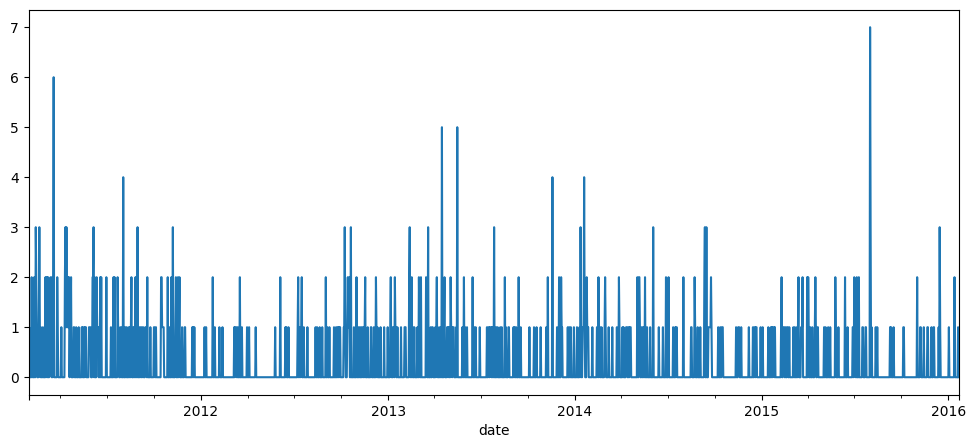

In [20]:
store_1_064['cnt'].plot(figsize=(12,5));

In [21]:
import statsmodels.api as sm

# Предполагаем, что store_1_064['cnt'] уже определен как Series или DataFrame
test = sm.tsa.adfuller(store_1_064['cnt'])

print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])

if test[0] > test[4]['5%']: 
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')


adf:  -12.041152488931608
p-value:  2.730292178314811e-22
Critical values:  {'1%': -3.433966009459769, '5%': -2.8631372667825503, '10%': -2.567620331903232}
единичных корней нет, ряд стационарен


In [22]:
from statsmodels. tsa.stattools import adfuller, kpss

In [23]:
adfuller(store_1_064['cnt'])

(-12.041152488931608,
 2.730292178314811e-22,
 7,
 1811,
 {'1%': -3.433966009459769,
  '5%': -2.8631372667825503,
  '10%': -2.567620331903232},
 3657.193325533198)

In [66]:
river_zero = store_1_064['cnt']

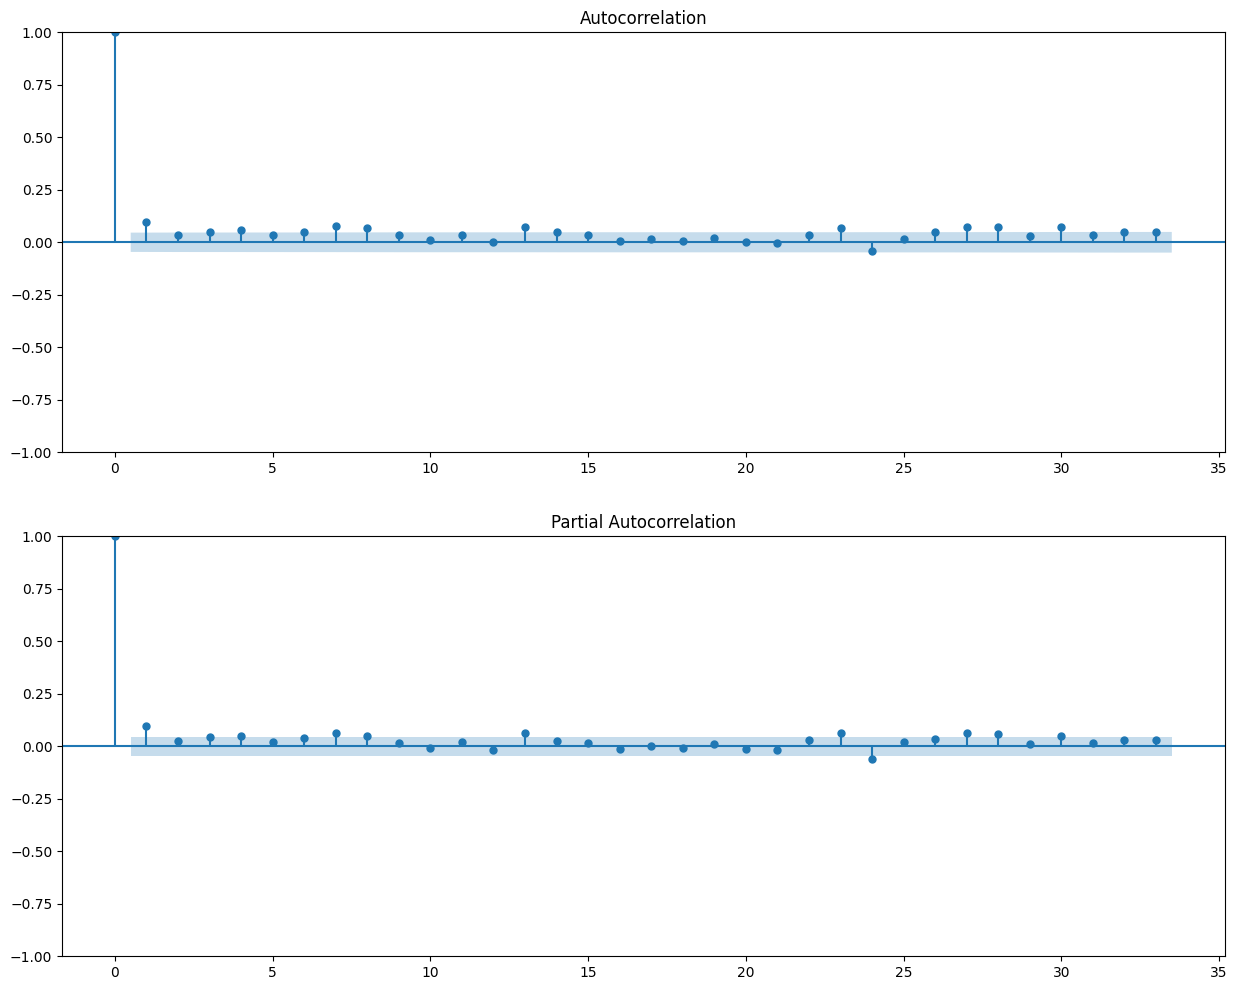

In [67]:
# подберем максимальные значения для p и q
fig,ax =plt.subplots(2,1,figsize= (15,12)) 
tsaplots.plot_acf(river_zero,ax=ax[0]);
tsaplots.plot_pacf(river_zero,ax=ax[1]);

In [75]:
from itertools import product
from sktime.forecasting.arima import ARIMA


In [76]:
def calc_optimum_arma(ts,
                      max_p,
                       max_q): 
    """
    Подбор оптимальных гиперпараметров модели ARMA с помощью критерия Акаике.
    Идет перебор всех вариантов (p,q) в пределах (0,max_p)*(0,max_q)
    
    """
    
    best_bic = float("inf")
    
    ps = range(0, max_p+1)
    qs = range(0, max_q+1)
    parameters = product(ps, qs)
    parameters_list = list(parameters)
    
    print(len(parameters_list))
    
    results = []
    for param in parameters_list:
        #try except нужен, потому что на некоторых наборах параметров модель не обучается
        try:
            model=ARIMA(order=(param[0], 0, param[1])).fit(ts)
        #выводим параметры, на которых модель не обучается и переходим к следующему набору
        except ValueError:
            print('wrong parameters:', param)
            continue
        aic = model._forecaster.aic()
        bic = model._forecaster.bic()
        #сохраняем лучшую модель, aic, параметры
        if bic < best_bic:
            best_model = model
            best_bic = aic
            best_param = param
        results.append([param, aic, bic]) 
    
    return results, best_model

In [78]:
# если мы, вопреки здравому смыслу, попробуем подобрать модель arma, скажем, вплоть до 4го порядка
params, arima = calc_optimum_arma(river_zero,4,4)

25


/Users/muzafarov/anaconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/muzafarov/anaconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/muzafarov/anaconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/muzafarov/anaconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/muzafarov/anaconda3/envs/timeseries/lib/python3.9/site-packag

In [79]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1819
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1860.838
Date:                Thu, 30 May 2024   AIC                           3729.676
Time:                        16:08:43   BIC                           3751.700
Sample:                    01-29-2011   HQIC                          3737.802
                         - 01-21-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0051      0.003      1.630      0.103      -0.001       0.011
ar.L1          0.9850      0.008    116.594      0.000       0.968       1.002
ma.L1         -0.9604      0.014    -68.715      0.000      -0.988      -0.933
sigma2         0.4530      0.008     56.376      0.000       0.437       0.469
===================================================================================
Ljung-Box (L1) (Q):                   4.92   Jarque-Bera (JB):             14581.66
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                             2.79
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Отделяемся

In [2]:
from prophet import Prophet

/Users/muzafarov/anaconda3/envs/timeseries/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


STORE_1_252

In [61]:
customer1 = sales[(sales['store_id'] == 'STORE_1') & (sales['item_id'] == 'STORE_1_252')]
store_1_252 = pd.merge(customer1, calendar, on='date_id', how='inner')
store_1_252.head(5)

,item_id,store_id,date_id,cnt,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,CASHBACK_STORE_1,CASHBACK_STORE_2,CASHBACK_STORE_3
0,STORE_1_252,STORE_1,1,22,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,STORE_1_252,STORE_1,2,23,2011-01-30,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,STORE_1_252,STORE_1,3,12,2011-01-31,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,STORE_1_252,STORE_1,4,12,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,0,1,1
4,STORE_1_252,STORE_1,5,8,2011-02-02,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,1,1,0


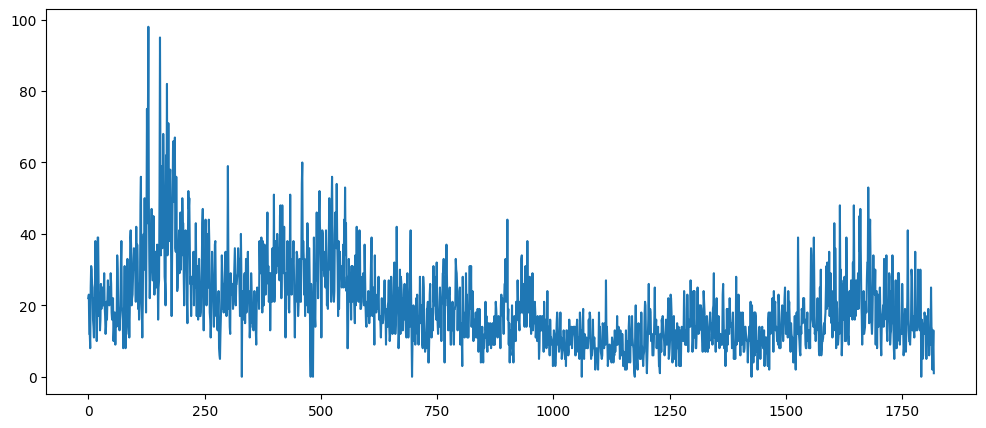

In [62]:
store_1_252['cnt'].plot(figsize=(12,5));

In [63]:
store_1_252 = store_1_252[['date', 'cnt']]

In [64]:
store_1_252.columns = ['ds', 'y']
store_1_252

,ds,y
0,2011-01-29,22
1,2011-01-30,23
2,2011-01-31,12
3,2011-02-01,12
4,2011-02-02,8
...,...,...
1814,2016-01-17,13
1815,2016-01-18,2
1816,2016-01-19,8
1817,2016-01-20,13


In [55]:
# fit_predict для профета реализовывается в несколько строчек
# по умолчанию профет оценивает частоту данных и моделирует соответствующие сезонности
# в этом примере он моделирует недельную и годовую сезонности
m = Prophet()
m.fit(store_1_252)
future = m.make_future_dataframe(periods=365)  # Предсказываем на 30 дней вперед
forecast = m.predict(future)


16:11:15 - cmdstanpy - INFO - Chain [1] start processing
16:11:15 - cmdstanpy - INFO - Chain [1] done processing


In [67]:
store_1_252

,ds,y
0,2011-01-29,22
1,2011-01-30,23
2,2011-01-31,12
3,2011-02-01,12
4,2011-02-02,8
...,...,...
1814,2016-01-17,13
1815,2016-01-18,2
1816,2016-01-19,8
1817,2016-01-20,13


In [74]:
# Извлекаем даты и названия праздников
holidays_1 = calendar[['date', 'event_name_1']].dropna().rename(columns={'date': 'ds', 'event_name_1': 'holiday'})
holidays_2 = calendar[['date', 'event_name_2']].dropna().rename(columns={'date': 'ds', 'event_name_2': 'holiday'})

# Объединяем оба набора данных
holidays = pd.concat([holidays_1, holidays_2])

# Добавляем столбцы lower_window и upper_window
holidays['lower_window'] = 0
holidays['upper_window'] = 1

# Убедимся, что столбец ds имеет тип datetime
holidays['ds'] = pd.to_datetime(holidays['ds'])

# Проверяем результат
print(holidays.head())


           ds        holiday  lower_window  upper_window
8  2011-02-06      SuperBowl             0             1
16 2011-02-14  ValentinesDay             0             1
23 2011-02-21  PresidentsDay             0             1
39 2011-03-09      LentStart             0             1
46 2011-03-16      LentWeek2             0             1


In [75]:
# Разделение данных на обучающую и тестовую выборки
train_data = store_1_252.iloc[:-30]
test_data = store_1_252.iloc[-30:]

# Создание и обучение модели Prophet с праздниками
model = Prophet(holidays=holidays)
model.fit(train_data)

16:36:45 - cmdstanpy - INFO - Chain [1] start processing
16:36:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 52.1974625387553
Mean Absolute Error: 6.223761313028217


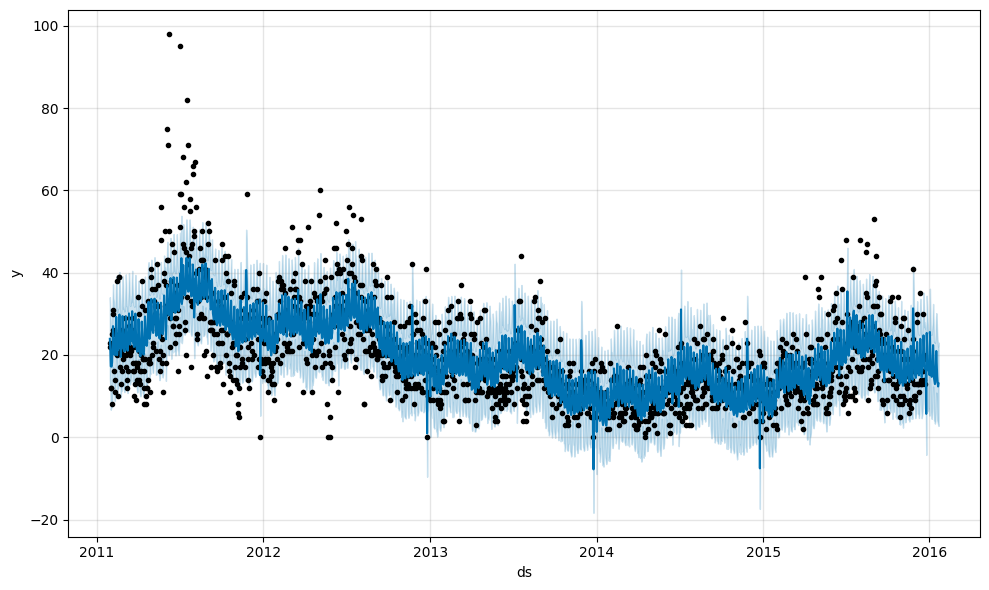

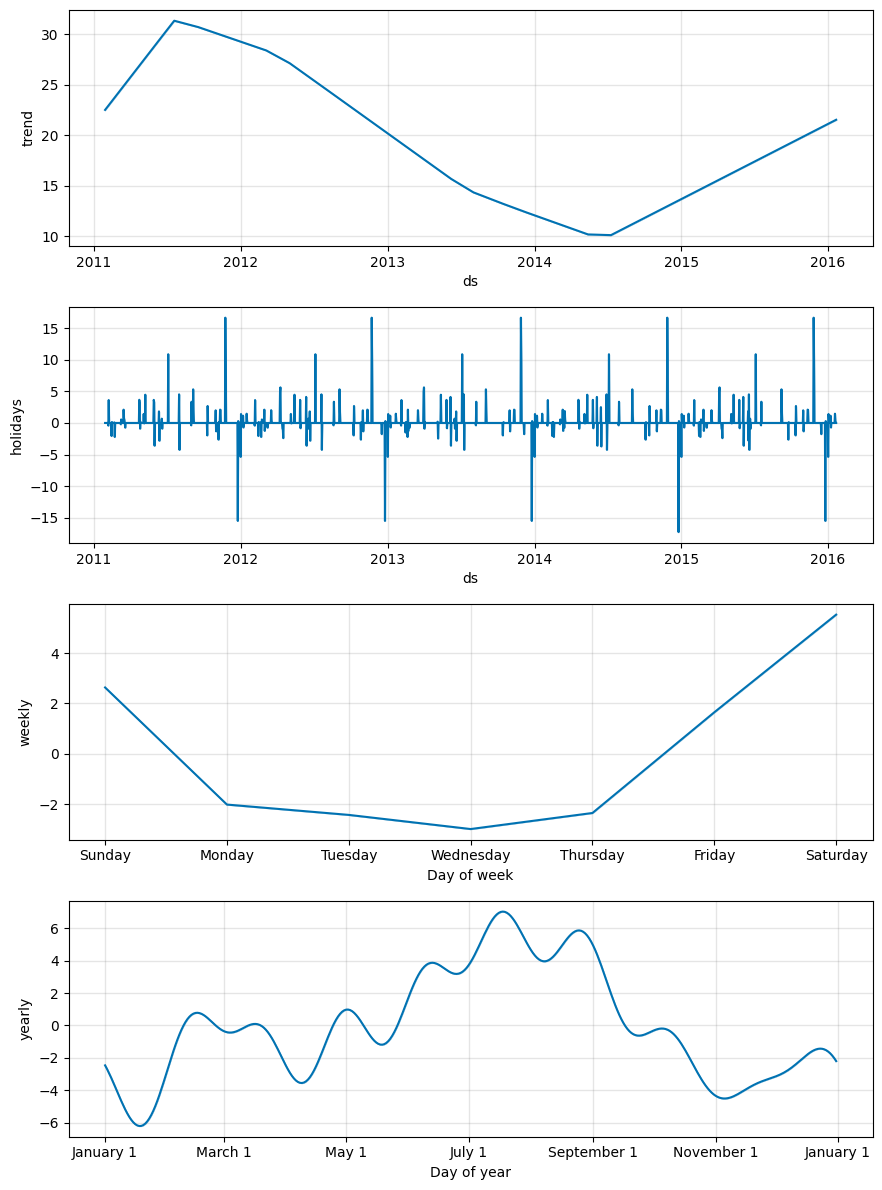

In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Создание прогноза для тестовой выборки
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Выборка последних 30 дней прогноза
predicted = forecast[['ds', 'yhat']].tail(30)

# Метрики точности прогноза
actual = test_data['y'].values
predicted_values = predicted['yhat'].values

mse = mean_squared_error(actual, predicted_values)
mae = mean_absolute_error(actual, predicted_values)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

# Визуализация прогноза
fig1 = model.plot(forecast)
plt.show()

# Визуализация компонентов прогноза
fig2 = model.plot_components(forecast)
plt.show()


16:42:35 - cmdstanpy - INFO - Chain [1] start processing
16:42:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 52.1974625387553
Mean Absolute Error: 6.223761313028217


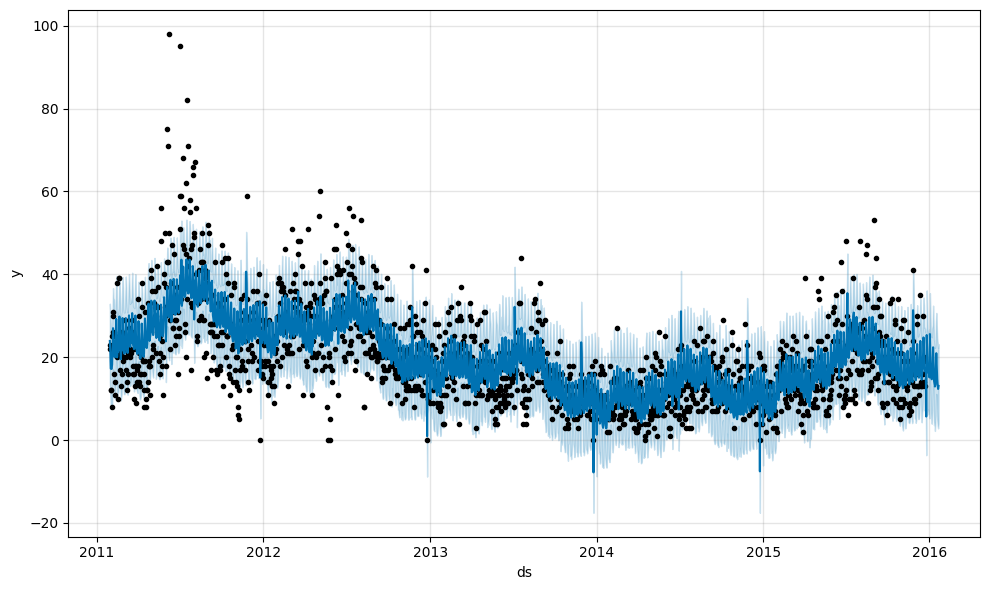

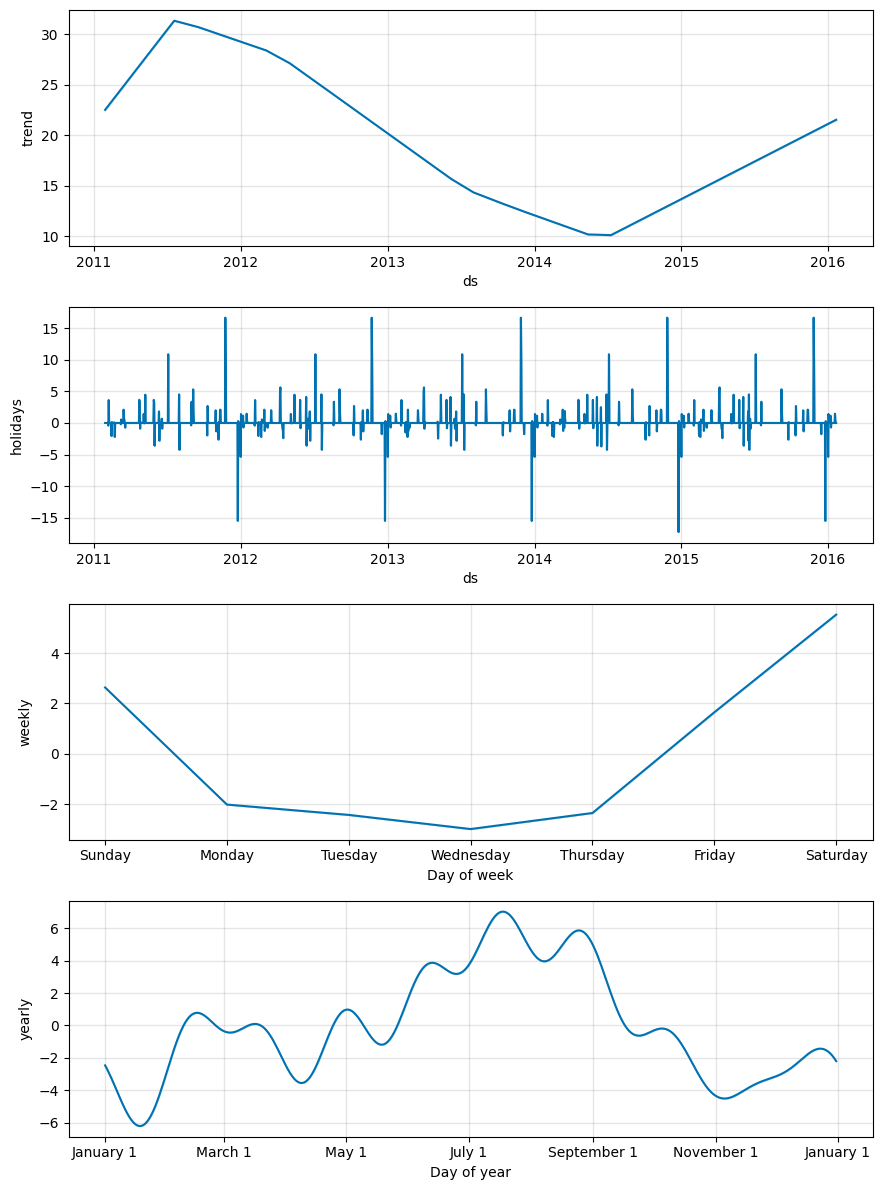

In [79]:
# Переименование столбцов для совместимости с Prophet
store_1_252 = store_1_252.rename(columns={'date': 'ds', 'cnt': 'y'})
store_1_252 = store_1_252.sort_values('ds')

# Разделение данных на обучающую и тестовую выборки
train_data = store_1_252.iloc[:-30]
test_data = store_1_252.iloc[-30:]

# Извлекаем даты и названия праздников
holidays_1 = calendar[['date', 'event_name_1']].dropna().rename(columns={'date': 'ds', 'event_name_1': 'holiday'})
holidays_2 = calendar[['date', 'event_name_2']].dropna().rename(columns={'date': 'ds', 'event_name_2': 'holiday'})

# Объединяем оба набора данных
holidays = pd.concat([holidays_1, holidays_2])

# Добавляем столбцы lower_window и upper_window
holidays['lower_window'] = 0
holidays['upper_window'] = 1

# Убедимся, что столбец ds имеет тип datetime
holidays['ds'] = pd.to_datetime(holidays['ds'])

# Создание DataFrame с будущими датами праздников
future_years = [2024, 2025, 2026]
future_holidays = []

for year in future_years:
    for holiday in holidays['holiday'].unique():
        future_holidays.append({
            'holiday': holiday,
            'ds': pd.to_datetime(f"{year}-01-01"),  # Здесь нужно указать соответствующие даты праздников
            'lower_window': 0,
            'upper_window': 1
        })

future_holidays_df = pd.DataFrame(future_holidays)

# Объединяем текущие и будущие праздники
all_holidays = pd.concat([holidays, future_holidays_df])

# Создание и обучение модели Prophet с праздниками
model = Prophet(holidays=all_holidays)
model.fit(train_data)

# Создание прогноза для тестовой выборки
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Выборка последних 30 дней прогноза
predicted = forecast[['ds', 'yhat']].tail(30)

# Метрики точности прогноза
actual = test_data['y'].values
predicted_values = predicted['yhat'].values

mse = mean_squared_error(actual, predicted_values)
mae = mean_absolute_error(actual, predicted_values)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

# Визуализация прогноза
fig1 = model.plot(forecast)
plt.show()

# Визуализация компонентов прогноза
fig2 = model.plot_components(forecast)
plt.show()


17:18:34 - cmdstanpy - INFO - Chain [1] start processing
17:18:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 50.79365115799475
Mean Absolute Error: 6.126335320632482


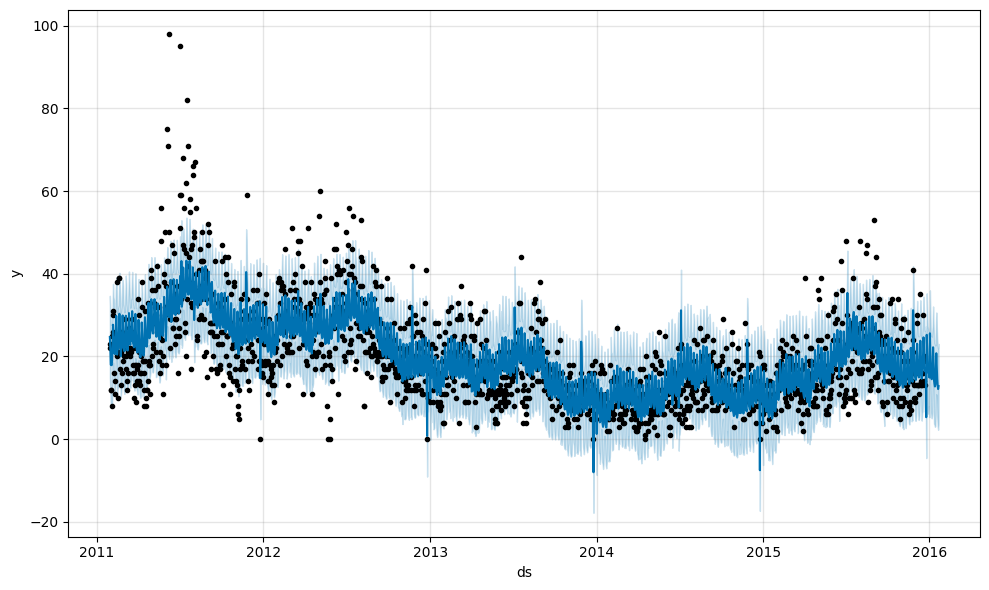

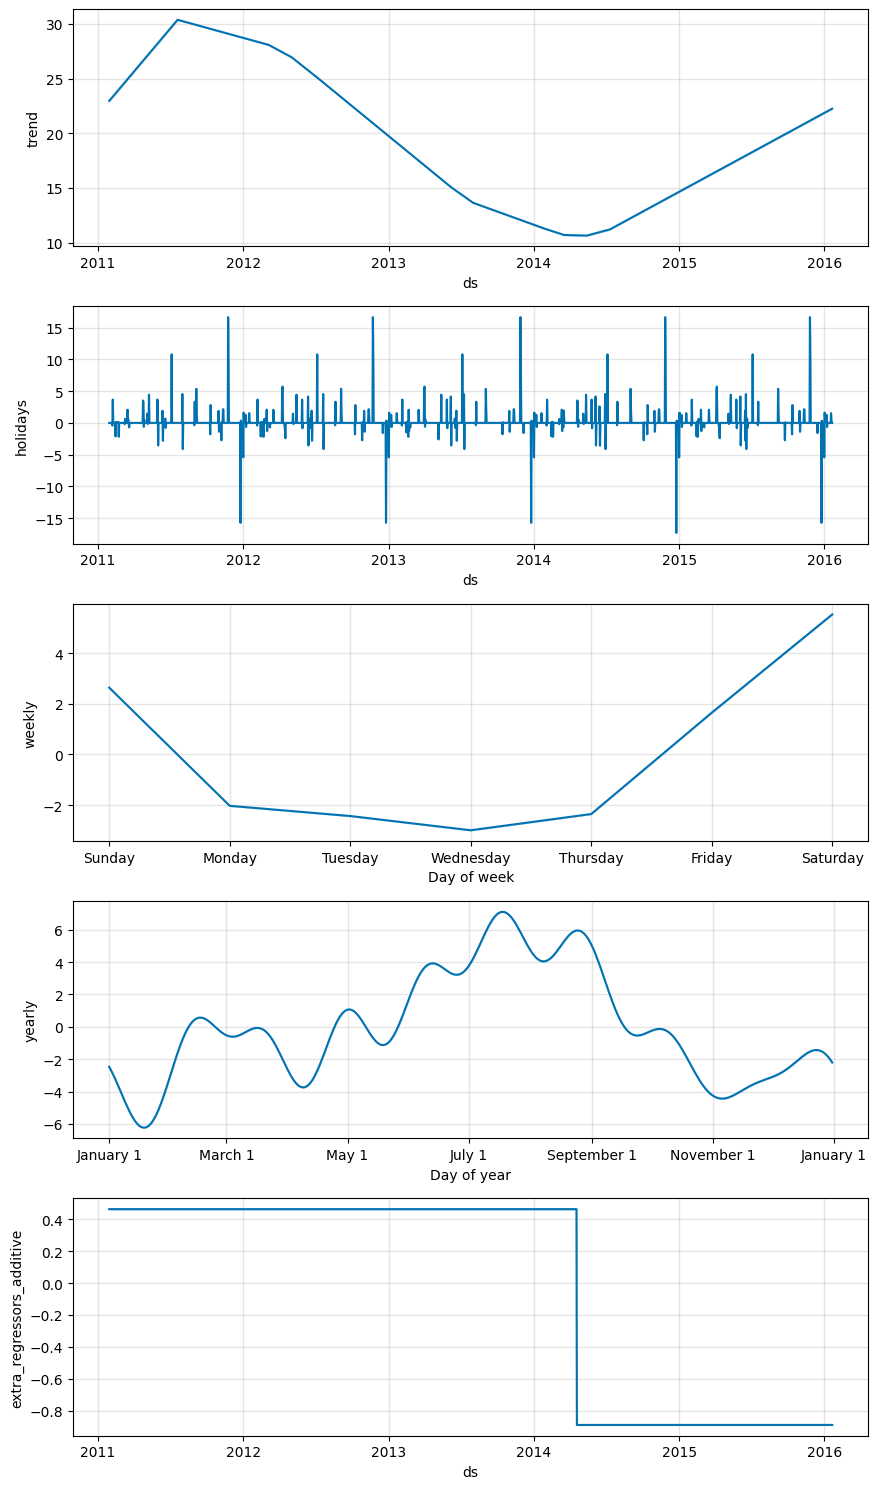

In [86]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Загрузка и подготовка данных
# Предполагаем, что ваши данные уже загружены в DataFrame store_1_252 и calendar
# store_1_252 и calendar должны быть pandas DataFrame

# Переименование столбцов для совместимости с Prophet
store_1_252 = store_1_252.rename(columns={'date': 'ds', 'cnt': 'y'})
store_1_252 = store_1_252.sort_values('ds')

# Убедимся, что столбец ds имеет тип datetime
store_1_252['ds'] = pd.to_datetime(store_1_252['ds'])

# Разделение данных на обучающую и тестовую выборки
train_data = store_1_252.iloc[:-30]
test_data = store_1_252.iloc[-30:]

# Извлекаем даты и названия праздников
holidays_1 = calendar[['date', 'event_name_1']].dropna().rename(columns={'date': 'ds', 'event_name_1': 'holiday'})
holidays_2 = calendar[['date', 'event_name_2']].dropna().rename(columns={'date': 'ds', 'event_name_2': 'holiday'})

# Объединяем оба набора данных
holidays = pd.concat([holidays_1, holidays_2])

# Добавляем столбцы lower_window и upper_window
holidays['lower_window'] = 0
holidays['upper_window'] = 1

# Убедимся, что столбец ds имеет тип datetime
holidays['ds'] = pd.to_datetime(holidays['ds'])

# Создание DataFrame с будущими датами праздников
future_years = [2024, 2025, 2026]
future_holidays = []

for year in future_years:
    for holiday in holidays['holiday'].unique():
        future_holidays.append({
            'holiday': holiday,
            'ds': pd.to_datetime(f"{year}-01-01"),  # Здесь нужно указать соответствующие даты праздников
            'lower_window': 0,
            'upper_window': 1
        })

future_holidays_df = pd.DataFrame(future_holidays)

# Объединяем текущие и будущие праздники
all_holidays = pd.concat([holidays, future_holidays_df])

# Подготовка данных о ценах
# Предполагаем, что у вас есть датафрейм prices и нужно получить данные только для интересующего вас продукта (например, 'STORE_1_252')
item_prices = prices[prices['item_id'] == 'STORE_1_252'][['wm_yr_wk', 'sell_price']]

# Убедимся, что wm_yr_wk в формате целого числа
item_prices['wm_yr_wk'] = item_prices['wm_yr_wk'].astype(int)

# Переименовываем столбцы для удобства
item_prices = item_prices.rename(columns={'wm_yr_wk': 'week', 'sell_price': 'price'})

# Добавляем даты в данные о ценах, если у нас есть календарь с недельным номером и датами
calendar['wm_yr_wk'] = calendar['wm_yr_wk'].astype(int)
item_prices = item_prices.merge(calendar[['wm_yr_wk', 'date']], left_on='week', right_on='wm_yr_wk', how='left')
item_prices = item_prices.rename(columns={'date': 'ds'}).drop(columns=['wm_yr_wk'])

# Убедимся, что столбец ds имеет тип datetime
item_prices['ds'] = pd.to_datetime(item_prices['ds'])

# Убедимся, что столбец ds имеет тип datetime и в store_1_252
store_1_252['ds'] = pd.to_datetime(store_1_252['ds'])

# Объединение данных о продажах и ценах
store_1_252 = store_1_252.merge(item_prices[['ds', 'price']], on='ds', how='left')

# Разделение данных на обучающую и тестовую выборки с ценами
train_data = store_1_252.iloc[:-30]
test_data = store_1_252.iloc[-30:]

# Создание и обучение модели Prophet с праздниками и регрессором
model = Prophet(holidays=all_holidays)
model.add_regressor('price')

# Обучение модели
model.fit(train_data)

# Создание прогноза для тестовой выборки
future = model.make_future_dataframe(periods=30)
# Объединяем данные о будущем с будущими ценами (предполагается, что у вас есть прогноз цен или просто используем последние известные цены)
future = future.merge(item_prices[['ds', 'price']], on='ds', how='left')

# Предсказание
forecast = model.predict(future)

# Выборка последних 30 дней прогноза
predicted = forecast[['ds', 'yhat']].tail(30)

# Метрики точности прогноза
actual = test_data['y'].values
predicted_values = predicted['yhat'].values

mse = mean_squared_error(actual, predicted_values)
mae = mean_absolute_error(actual, predicted_values)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

# Визуализация прогноза
fig1 = model.plot(forecast)
plt.show()

# Визуализация компонентов прогноза
fig2 = model.plot_components(forecast)
plt.show()


In [92]:
prices

,store_id,item_id,wm_yr_wk,sell_price
0,STORE_2,STORE_2_085,11101,1.00
1,STORE_2,STORE_2_043,11101,2.88
2,STORE_2,STORE_2_054,11101,2.28
3,STORE_2,STORE_2_090,11101,1.25
4,STORE_2,STORE_2_252,11101,1.48
...,...,...,...,...
11136,STORE_1,STORE_1_584,11551,1.00
11137,STORE_1,STORE_1_586,11551,1.68
11138,STORE_1,STORE_1_587,11551,2.48
11139,STORE_1,STORE_1_714,11551,1.58


In [91]:
item_prices

,week,price,ds
0,11101,1.48,2011-01-29
1,11101,1.48,2011-01-30
2,11101,1.48,2011-01-31
3,11101,1.48,2011-02-01
4,11101,1.48,2011-02-02
...,...,...,...
1814,11551,1.58,2016-01-17
1815,11551,1.58,2016-01-18
1816,11551,1.58,2016-01-19
1817,11551,1.58,2016-01-20


In [90]:
store_1_252

,ds,y,price
0,2011-01-29,22,1.48
1,2011-01-30,23,1.48
2,2011-01-31,12,1.48
3,2011-02-01,12,1.48
4,2011-02-02,8,1.48
...,...,...,...
1814,2016-01-17,13,1.58
1815,2016-01-18,2,1.58
1816,2016-01-19,8,1.58
1817,2016-01-20,13,1.58


In [89]:
item = 252
customer = sales[(sales['store_id'] == 'STORE_1') & (sales['item_id'] == f'STORE_1_{item}')]
customer = pd.merge(customer, calendar, on='date_id', how='inner')
customer = customer.rename(columns={'date': 'ds', 'cnt': 'y'})
customer = customer[['ds', 'y']]
customer

,ds,y
0,2011-01-29,22
1,2011-01-30,23
2,2011-01-31,12
3,2011-02-01,12
4,2011-02-02,8
...,...,...
1814,2016-01-17,13
1815,2016-01-18,2
1816,2016-01-19,8
1817,2016-01-20,13
